# Time Series Analysis Exercise 1: Seattle Bicycles

In this exercise we will practice exploratory data analysis on time series data, using the Seattle [Fremont Bridge Bicycle Counter](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k) dataset from [Seattle's Open Data portal](https://data.seattle.gov/).

This exercise requires the `statsmodels` library, available by default in Google Colab and Anaconda and which can be installed with `pip install statsmodels`.

**Questions:**
1. Load the attached `Fremont_Bridge_Bicycle_Counter.csv` dataset as a Pandas DataFrame `bike_df`. What are the columns of this DataFrame?

In [1]:
# your code here
import pandas as pd
bike_df = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv')

In [2]:
bike_df.columns

Index(['Date', 'Fremont Bridge Total', 'Fremont Bridge East Sidewalk',
       'Fremont Bridge West Sidewalk'],
      dtype='object')

The columns of this dataframe are : 'Date', 'Fremont Bridge Total', 'Fremont Bridge East Sidewalk','Fremont Bridge West Sidewalk'

2. We will only use the date and total number of bicycle crossings as our features. Use the arguments `usecols=`, `index_col=`, and `parse_dates=True` in `pd.read_csv()` so that only the `"Date"` and `"Fremont Bridge Total"` columns are read, and the dates are used as the DataFrame index.


In [3]:
# your code here
bike_df = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', usecols = ['Fremont Bridge Total', 'Date'], index_col = ['Date'], parse_dates = True)

3. Run `bike_df.describe()` and give a short explanation of the statistics that are printed. Hint: What time period does each row of `bike_df` cover?


In [4]:
# your code here
bike_df.describe()

,Fremont Bridge Total
count,86122.000000
mean,106.798449
std,134.926536
min,0.000000
25%,13.000000
50%,59.000000
75%,143.000000
max,1097.000000


We get statistics of bike that crossed the bridge per hour per day between 2012 and 2022.
We get that in average, around 107 bikes are crossing the bridge per hour. The minimum is 0 bike, the maximum is 1097 bikes per hour that crossed the bridge. 25% of the values are below 13, 50% of the values are below 59 and 75% of the values are below 143. The standard deviation of the data is around 135.

4. Plot bike crossings for the month of January 2016. What patterns do you see in the data? Hint: you can `bike_df.loc['2016-01']` to access a month in the date-time index of the DataFrame. Use the Pandas DataFrame `.plot()` function and not `plt.plot(...)` from Matplotlib.


<Axes: xlabel='Date'>

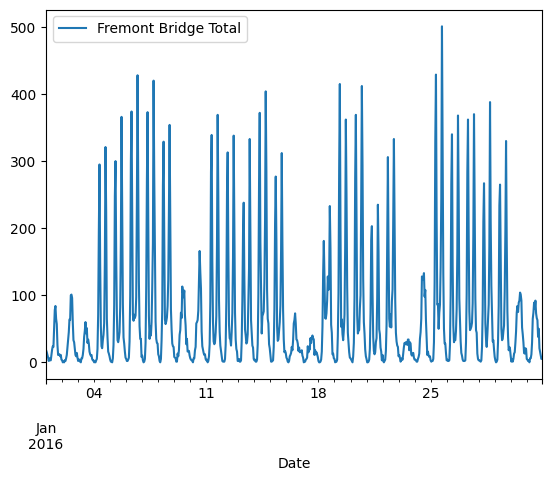

In [5]:
# your code here
bike_df.loc['2016-01'].plot()

We see a seasonality in the data. Each 7 days we can see a similar pattern.

5. Use `bikes_per_week = bike_df.resample(...).sum()['Fremont Bridge Total']` to get the total bike crossings per week for the entire time period covered in the dataset, and plot this data. What seasonal pattern do you see in the data?


In [6]:
# your code here# your code here
bikes_per_week = bike_df.resample('W')['Fremont Bridge Total'].sum()

<Axes: xlabel='Date'>

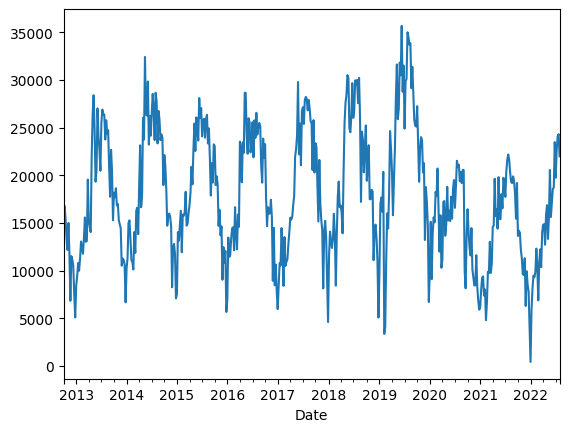

In [7]:
bikes_per_week.plot()

We can see a seasonal pattern on the data on each year.

6. Examine the autocorrelation plots generated below and explain them using your answers to questions 4-5.


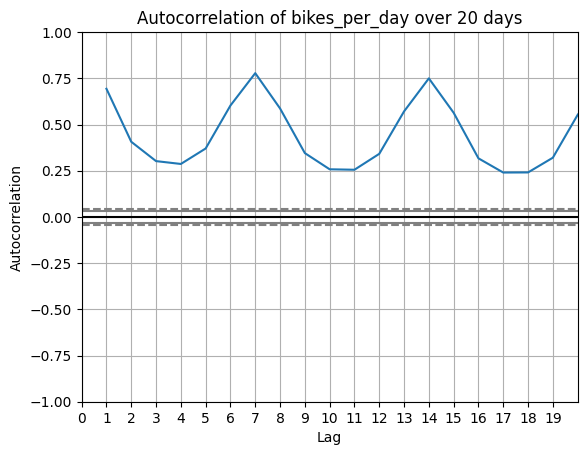

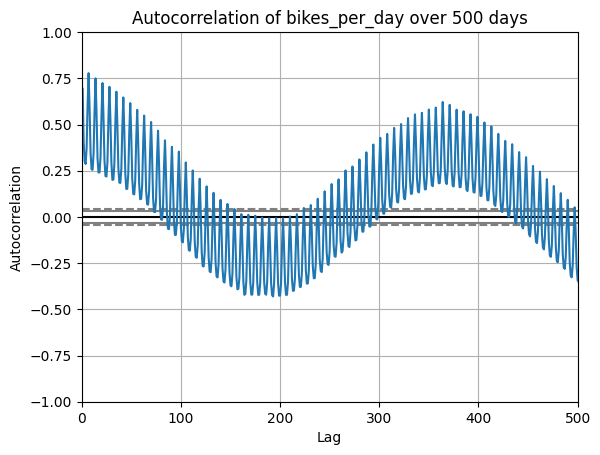

In [8]:
# code for question 6
from matplotlib import pyplot as plt

bikes_per_day = bike_df.resample('d').sum()['Fremont Bridge Total']

plt.figure()
pd.plotting.autocorrelation_plot(bikes_per_day)
plt.xlim((0, 20))
plt.ylim((-1, 1))
plt.xticks(range(20))
plt.title('Autocorrelation of bikes_per_day over 20 days')

plt.figure()
pd.plotting.autocorrelation_plot(bikes_per_day)
plt.xlim((0,500))
plt.ylim((-1, 1))
plt.title('Autocorrelation of bikes_per_day over 500 days');

On the first plot, we can see that we have every 7 days a pattern in the autocorrelation, corresponding to what we said on q4. So we have a periodic pattern of period 7.

On the second plot, we can see that we have every aproximatively 365 days a pattern in the autocorrelation plot, corresponding to what we said on q5. So we have a periodic pattern of period 365 (corresponding to a year).

7. Use `statsmodels.tsa.seasonal.seasonal_decompose()` on `bikes_per_week` to decompose it into seasonal, trend, and residual components. Plot all of these components on the same graph, and explain what each component represents. What can you say about how the number of bicycle crossings have changed over time?


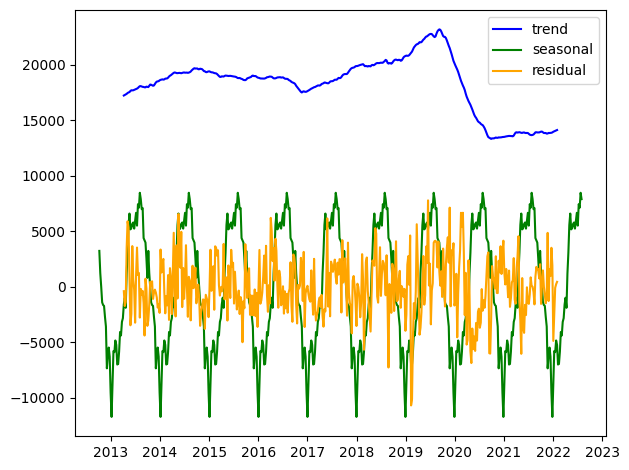

In [9]:
# your code here
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
result = seasonal_decompose(bikes_per_week)
plt.plot(bikes_per_week.index, result.trend, color = 'b', label = 'trend')
plt.plot(bikes_per_week.index, result.seasonal, color = 'g', label = 'seasonal')
plt.plot(bikes_per_week.index, result.resid, color = 'orange', label = 'residual')
plt.legend()
plt.tight_layout()
plt.show()

'Trend' represents the overall shape of the data, without taking into consideration seasonals patterns and random fluctuations.

'Seasonal' represents the pattern on our data based on periodic behavior.

'residual' contains the noise and irregularity fluctuations of our data, after having removed trend and seasonality.

We can see that the number of bicycle crossings increased from 2013 to 2020 (from 17k to 23k) but then drastically decreased (probably du to covid) between 2020 and 2021 to reach 13k.
Since 2021, it increased a bit to approximatively 14k.

**BONUS:** Describe the meaning of the graph generated by the code below marked BONUS.

In [10]:
# your code here

In [11]:
bike_df['Fremont Bridge Total'].index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2022-07-31 14:00:00', '2022-07-31 15:00:00',
               '2022-07-31 16:00:00', '2022-07-31 17:00:00',
               '2022-07-31 18:00:00', '2022-07-31 19:00:00',
               '2022-07-31 20:00:00', '2022-07-31 21:00:00',
               '2022-07-31 22:00:00', '2022-07-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=86136, freq=None)

In [12]:
bike_df['Fremont Bridge Total'].head().index.dayofweek

Int64Index([2, 2, 2, 2, 2], dtype='int64', name='Date')

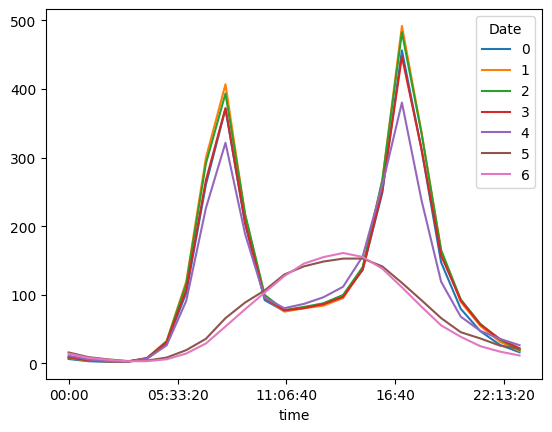

In [13]:
# code for BONUS question
bike_df['Fremont Bridge Total'].groupby([
    bike_df.index.time,
    bike_df.index.dayofweek
]).mean().unstack().plot();

This graph shows the number of bicycle crossing from 2013 to 2023 depending on the time and the day of the week.

We see that around 6am we have a pic in number of bicycle crossing, then a decrease until 3pm and then a huge puc around 5pm.

We see that during weekends we have way less bicycle crossing than during the week.